## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("WHI_Inflation.csv")
df.head()

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,-0.660,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016,4.380,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017,4.976,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018,0.630,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019,2.302,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000


In [2]:
# Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1232 non-null   object 
 1   Year                                    1232 non-null   int64  
 2   Headline Consumer Price Inflation       1200 non-null   float64
 3   Energy Consumer Price Inflation         1090 non-null   float64
 4   Food Consumer Price Inflation           1130 non-null   float64
 5   Official Core Consumer Price Inflation  734 non-null    float64
 6   Producer Price Inflation                769 non-null    float64
 7   GDP deflator Index growth rate          1211 non-null   float64
 8   Continent/Region                        1232 non-null   object 
 9   Score                                   1232 non-null   float64
 10  GDP per Capita                          1232 non-null   floa

In [3]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Country                                 1232 non-null   object        
 1   Year                                    1232 non-null   datetime64[ns]
 2   Headline Consumer Price Inflation       1200 non-null   float64       
 3   Energy Consumer Price Inflation         1090 non-null   float64       
 4   Food Consumer Price Inflation           1130 non-null   float64       
 5   Official Core Consumer Price Inflation  734 non-null    float64       
 6   Producer Price Inflation                769 non-null    float64       
 7   GDP deflator Index growth rate          1211 non-null   float64       
 8   Continent/Region                        1232 non-null   object        
 9   Score                                   1232 non-nul

In [4]:
df.isna().sum()

Country                                     0
Year                                        0
Headline Consumer Price Inflation          32
Energy Consumer Price Inflation           142
Food Consumer Price Inflation             102
Official Core Consumer Price Inflation    498
Producer Price Inflation                  463
GDP deflator Index growth rate             21
Continent/Region                            0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
dtype: int64

In [5]:
df.dropna(subset = ['Headline Consumer Price Inflation', 'GDP deflator Index growth rate'], inplace = True)
df

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015-01-01,-0.660000,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.5750,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190
1,Afghanistan,2016-01-01,4.380000,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.3600,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120
2,Afghanistan,2017-01-01,4.976000,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.7940,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158
3,Afghanistan,2018-01-01,0.630000,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000
4,Afghanistan,2019-01-01,2.302000,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.2030,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,Zimbabwe,2019-01-01,255.292007,90.808071,86.124371,NaN,NaN,-4.035235,Sub-Saharan Africa,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000
1228,Zimbabwe,2020-01-01,557.210000,306.431673,601.020236,NaN,NaN,568.971862,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
1229,Zimbabwe,2021-01-01,98.546000,69.820000,105.800000,NaN,NaN,113.294981,Sub-Saharan Africa,3.1450,0.457000,0.649000,0.243000,0.359000,0.157000,0.075000
1230,Zimbabwe,2022-01-01,104.705171,97.246550,149.967034,NaN,NaN,113.018434,Sub-Saharan Africa,2.9950,0.947000,0.690000,0.270000,0.329000,0.106000,0.105000


In [6]:
ecpi = df.dropna(subset = 'Energy Consumer Price Inflation')
fcpi = df.dropna(subset = 'Food Consumer Price Inflation')
occpi = df.dropna(subset = 'Official Core Consumer Price Inflation')
ppi = df.dropna(subset = 'Producer Price Inflation')

occpi.head()

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015-01-01,-0.660000,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016-01-01,4.380000,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017-01-01,4.976000,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018-01-01,0.630000,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
9,Albania,2015-01-01,1.910179,-0.520000,4.319489,-0.156957,NaN,0.564278,Central and Eastern Europe,4.959,0.878670,0.804340,0.813250,0.35733,0.142720,0.064130


In [7]:
core_i = df.drop(columns=['Energy Consumer Price Inflation','Food Consumer Price Inflation','Headline Consumer Price Inflation','Producer Price Inflation'])
core_i.head()

,Country,Year,Official Core Consumer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015-01-01,0.219999,2.665090,South Asia,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190
1,Afghanistan,2016-01-01,5.192760,-2.409509,South Asia,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120
2,Afghanistan,2017-01-01,5.423228,2.404000,South Asia,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158
3,Afghanistan,2018-01-01,-0.126033,2.071208,South Asia,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000
4,Afghanistan,2019-01-01,NaN,6.520928,South Asia,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000


## Inflation Rates vs Happiness Score

## Regional Analysis

In [8]:
countryGroups = core_i.groupby('Country')
print(f'There are {len(countryGroups)} countries that are apart of our analysis.')
regionGroups = core_i.groupby('Continent/Region')
print(f'There are {len(regionGroups)} regions we will explore in our analysis.')

There are 144 countries that are apart of our analysis.
There are 10 regions we will explore in our analysis.


In [9]:
regionGroups[['Official Core Consumer Price Inflation', 'Score']].describe()

Official Core Consumer Price Inflation  \
                                                                    count   
Continent/Region                                                            
Central and Eastern Europe                                          141.0   
Commonwealth of Independent States                                   17.0   
East Asia                                                            18.0   
Latin America and Caribbean                                         116.0   
Middle East and North Africa                                         70.0   
North America and ANZ                                                36.0   
South Asia                                                           22.0   
Southeast Asia                                                       54.0   
Sub-Saharan Africa                                                   61.0   
Western Europe                                                      181.0   

                                                                             \
                                        mean       std        min       25%   
Continent/Region                                                              
Central and Eastern Europe          3.960802  4.959692  -2.602570  1.197296   
Commonwealth of Independent States  7.522550  3.961462   3.338568  4.216932   
East Asia                           0.896249  0.877243  -0.733000  0.353245   
Latin America and Caribbean         3.455796  2.957196 -12.823760  2.203079   
Middle East and North Africa        4.138069  7.670779  -1.157589  0.655729   
North America and ANZ               2.632266  1.632382  -0.004077  1.554879   
South Asia                          6.255988  8.577293  -0.126033  3.454992   
Southeast Asia                      1.996544  1.352693  -0.155333  0.894941   
Sub-Saharan Africa                  7.876744  9.486188  -2.076419  2.500986   
Western Europe                      1.673390  4.466573 -28.619415  0.680349   

                                                                   Score  \
                                         50%       75%        max  count   
Continent/Region                                                           
Central and Eastern Europe          2.225833  5.369061  40.392887  184.0   
Commonwealth of Independent States  7.071596  7.672875  15.398986   35.0   
East Asia                           0.697439  1.617104   2.719216   27.0   
Latin America and Caribbean         3.533570  4.692310   9.978545  181.0   
Middle East and North Africa        1.782515  4.864082  58.612938  119.0   
North America and ANZ               2.081882  3.607000   6.152031   36.0   
South Asia                          4.838763  5.473905  42.047107   60.0   
Southeast Asia                      1.809691  2.972500   4.889873   72.0   
Sub-Saharan Africa                  4.482551  9.763340  58.851863  302.0   
Western Europe                      1.366979  2.774833  22.301197  182.0   

                                                                        \
                                        mean       std    min      25%   
Continent/Region                                                         
Central and Eastern Europe          5.552135  0.638855  4.096  5.16435   
Commonwealth of Independent States  5.694637  0.411116  4.786  5.42150   
East Asia                           5.535144  0.393318  4.874  5.21800   
Latin America and Caribbean         6.028151  0.634664  3.582  5.75200   
Middle East and North Africa        5.653762  0.883368  2.955  4.94450   
North America and ANZ               7.176058  0.157204  6.886  7.07750   
South Asia                          4.516835  0.737572  2.404  4.27925   
Southeast Asia                      5.420746  0.749379  3.819  5.00785   
Sub-Saharan Africa                  4.247411  0.636444  2.693  3.76800   
Western Europe                      6.850220  0.678840  4.857  6.44325   

                                                     

In [10]:
correlations = []
regions = []

for r, g in regionGroups:
    regions.append(r)
    correlations.append(g[['Official Core Consumer Price Inflation','Score']].corr().iloc[0,1])

corrDf = pd.DataFrame(regions)
corrDf['correlations'] = correlations
corrDf.columns = ['Regions','Pearson Correlation']
corrDf

,Regions,Pearson Correlation
0,Central and Eastern Europe,0.065863
1,Commonwealth of Independent States,0.694978
2,East Asia,-0.446316
3,Latin America and Caribbean,-0.176797
4,Middle East and North Africa,-0.230165
5,North America and ANZ,-0.409493
6,South Asia,0.216043
7,Southeast Asia,-0.283272
8,Sub-Saharan Africa,-0.290155
9,Western Europe,0.179849


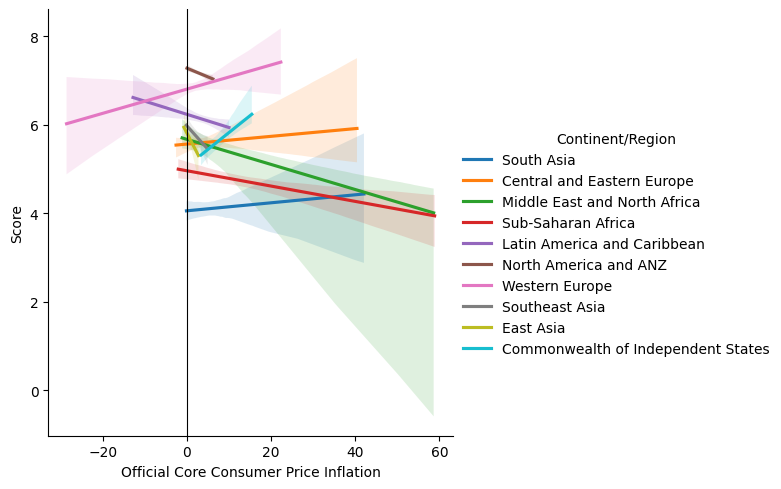

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=core_i, x='Official Core Consumer Price Inflation', y='Score', hue='Continent/Region',scatter=None)
plt.axvline(x=0,color='black',linewidth=.8)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Central and Eastern Europe'),
  Text(1, 0, 'Commonwealth of Independent States'),
  Text(2, 0, 'East Asia'),
  Text(3, 0, 'Latin America and Caribbean'),
  Text(4, 0, 'Middle East and North Africa'),
  Text(5, 0, 'North America and ANZ'),
  Text(6, 0, 'South Asia'),
  Text(7, 0, 'Southeast Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Western Europe')])

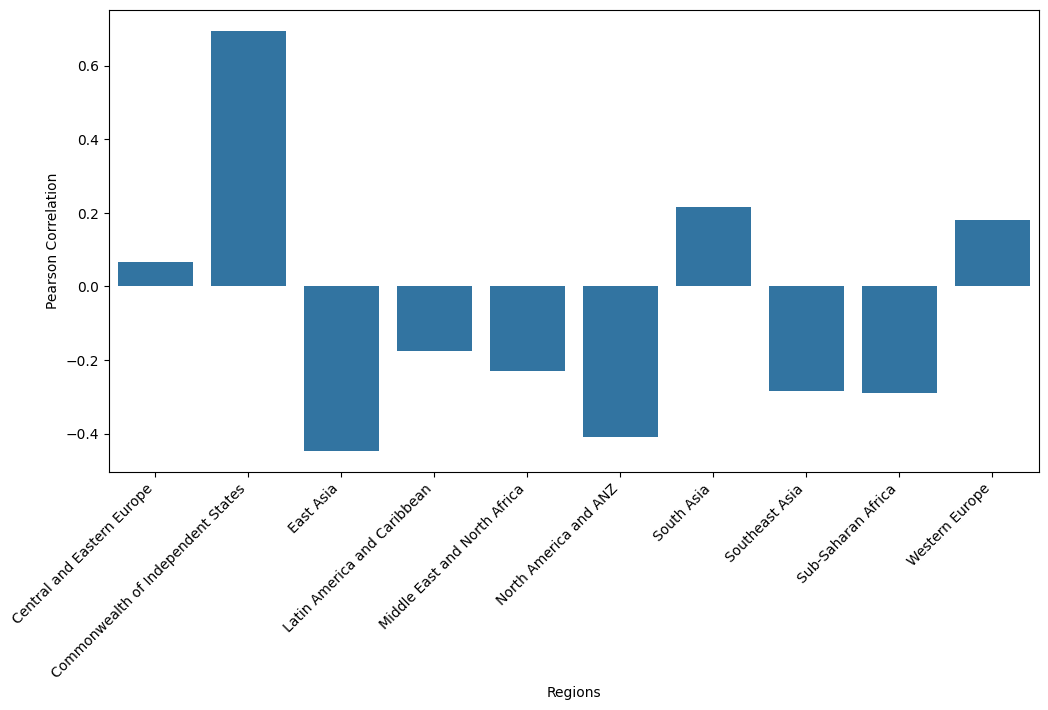

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=corrDf,x='Regions',y='Pearson Correlation')
plt.xticks(rotation=45, ha='right')

## Election Correlation

### Web-Scraping and Data Cleaning

In [13]:
! pip install lxml


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
url = 'https://en.wikipedia.org/wiki/List_of_next_general_elections'

tables = pd.read_html(url)

# Combining wikipedia's tables
elections = pd.concat(tables[1:6], ignore_index= True)

# Removing multi-index
elections.columns = [' - '.join(col).strip() for col in elections.columns.values]

elections = elections[['Country - Country', 'Presidential election - Term', 'Presidential election - Last']]
elections.replace(['—', '–', 'Next', 'TBD'], '', inplace = True)

elections

,Country - Country,Presidential election - Term,Presidential election - Last
0,Algeria,5,7 Sep 2024
1,Angola,5,24 Aug 2022
2,Benin,5,11 Apr 2021
3,Botswana,,
4,Burkina Faso,5,22 Nov 2020
...,...,...,...
204,Samoa,5,23 Aug 2022
205,Solomon Islands,,
206,Tonga,,
207,Tuvalu,,


In [15]:
elections['Presidential election - Term'] = pd.to_numeric(elections['Presidential election - Term'], errors='coerce')
elections['Presidential election - Last'] = pd.to_datetime(elections['Presidential election - Last'], errors='coerce')

elections.dropna(inplace = True)
elections

,Country - Country,Presidential election - Term,Presidential election - Last
0,Algeria,5.0,2024-09-07
1,Angola,5.0,2022-08-24
2,Benin,5.0,2021-04-11
4,Burkina Faso,5.0,2020-11-22
5,Burundi,7.0,2020-05-20
...,...,...,...
198,Micronesia,4.0,2023-05-11
199,Nauru,3.0,2022-09-28
202,Palau,4.0,2024-11-05
204,Samoa,5.0,2022-08-23


In [16]:
elections = elections.rename(columns={'Country - Country': 'Country'})

elections = elections.sort_values(by = 'Country')
print(elections['Presidential election - Term'].value_counts())

# Relevant countries
elections = elections[elections['Country'].isin(df['Country'])]

# Elections every four and five years
elections = elections[(elections['Presidential election - Term'] == 4.0) |( elections['Presidential election - Term'] == 5.0)]

# Before 2024
elections = elections[elections['Presidential election - Last'] < datetime(2024, 1, 1)]

elections.head()

Presidential election - Term
5.0    89
4.0    27
7.0    14
6.0    13
3.0     2
1.0     1
Name: count, dtype: int64


,Country,Presidential election - Term,Presidential election - Last
139,Albania,5.0,2022-05-16
1,Angola,5.0,2022-08-24
57,Argentina,4.0,2023-10-22
94,Bangladesh,5.0,2023-02-13
2,Benin,5.0,2021-04-11


In [17]:
elections_df = df.merge(elections, on='Country', how='inner')

# Relevant columns for election analysis
elections_df = elections_df[['Country', 'Year', 'Official Core Consumer Price Inflation', 
                             'Score', 'Presidential election - Term', 'Presidential election - Last']]

elections_df

,Country,Year,Official Core Consumer Price Inflation,Score,Presidential election - Term,Presidential election - Last
0,Albania,2015-01-01,-0.156957,4.9590,5.0,2022-05-16
1,Albania,2016-01-01,0.151382,4.6550,5.0,2022-05-16
2,Albania,2017-01-01,0.819713,4.6440,5.0,2022-05-16
3,Albania,2018-01-01,0.928374,4.5860,5.0,2022-05-16
4,Albania,2019-01-01,0.735378,4.7190,5.0,2022-05-16
...,...,...,...,...,...,...
447,Zimbabwe,2019-01-01,NaN,3.6630,5.0,2023-08-23
448,Zimbabwe,2020-01-01,NaN,3.2992,5.0,2023-08-23
449,Zimbabwe,2021-01-01,NaN,3.1450,5.0,2023-08-23
450,Zimbabwe,2022-01-01,NaN,2.9950,5.0,2023-08-23


In [18]:
def assign_columns(df, name):
    new_column_names = [df.columns[0]] + [
        col + name for col in df.columns[1:]
    ]
    df.columns = new_column_names
    return df

cols = ['Country', 'Year', 'Official Core Consumer Price Inflation', 'Score']

non_election_years = elections_df[elections_df['Year'].dt.year ==  (elections_df['Presidential election - Last'].dt.year - 
                                                               (elections_df['Presidential election - Term']) + 1)]

non_election_years = non_election_years[cols]
non_election_years = assign_columns(non_election_years, ' (Non-Election)')


election_years = elections_df[elections_df['Year'].dt.year == elections_df['Presidential election - Last'].dt.year]
election_years = election_years[cols]
election_years = assign_columns(election_years, ' (Election)')

election_years.head()

,Country,Year (Election),Official Core Consumer Price Inflation (Election),Score (Election)
7,Albania,2022-01-01,6.501041,5.1990
21,Argentina,2023-01-01,NaN,6.0240
30,Bangladesh,2023-01-01,NaN,4.2820
37,Benin,2021-01-01,NaN,5.0450
45,Bolivia,2020-01-01,NaN,5.7475


In [19]:
elections_df = non_election_years.merge(election_years, on = 'Country', how = 'inner')
elections_df.head(10)

,Country,Year (Non-Election),Official Core Consumer Price Inflation (Non-Election),Score (Non-Election),Year (Election),Official Core Consumer Price Inflation (Election),Score (Election)
0,Albania,2018-01-01,0.928374,4.5860,2022-01-01,6.501041,5.1990
1,Argentina,2020-01-01,NaN,5.9747,2023-01-01,NaN,6.0240
2,Bangladesh,2019-01-01,NaN,4.4560,2023-01-01,NaN,4.2820
3,Benin,2017-01-01,NaN,3.6570,2021-01-01,NaN,5.0450
4,Bolivia,2016-01-01,NaN,5.8220,2020-01-01,NaN,5.7475
5,Bosnia and Herzegovina,2019-01-01,NaN,5.3860,2022-01-01,NaN,5.7680
6,Brazil,2019-01-01,3.515498,6.3000,2022-01-01,8.759518,6.2930
7,Bulgaria,2018-01-01,1.601698,4.9330,2021-01-01,1.391320,5.2660
8,Burkina Faso,2016-01-01,NaN,3.7390,2020-01-01,NaN,4.7687
9,Chile,2018-01-01,1.717328,6.4760,2021-01-01,3.821000,6.1720


In [20]:
elections_df.dropna(inplace = True)
elections_df.head()

,Country,Year (Non-Election),Official Core Consumer Price Inflation (Non-Election),Score (Non-Election),Year (Election),Official Core Consumer Price Inflation (Election),Score (Election)
0,Albania,2018-01-01,0.928374,4.586,2022-01-01,6.501041,5.199
6,Brazil,2019-01-01,3.515498,6.300,2022-01-01,8.759518,6.293
7,Bulgaria,2018-01-01,1.601698,4.933,2021-01-01,1.391320,5.266
9,Chile,2018-01-01,1.717328,6.476,2021-01-01,3.821000,6.172
10,China,2019-01-01,1.703221,5.191,2023-01-01,0.588709,5.818


In [21]:
elections_df['Inflation Difference'] = elections_df['Official Core Consumer Price Inflation (Election)'] - elections_df['Official Core Consumer Price Inflation (Non-Election)']
elections_df['Happiness Difference'] = elections_df['Score (Election)'] - elections_df['Score (Non-Election)']

elections_df.head()

,Country,Year (Non-Election),Official Core Consumer Price Inflation (Non-Election),Score (Non-Election),Year (Election),Official Core Consumer Price Inflation (Election),Score (Election),Inflation Difference,Happiness Difference
0,Albania,2018-01-01,0.928374,4.586,2022-01-01,6.501041,5.199,5.572667,0.613
6,Brazil,2019-01-01,3.515498,6.300,2022-01-01,8.759518,6.293,5.244021,-0.007
7,Bulgaria,2018-01-01,1.601698,4.933,2021-01-01,1.391320,5.266,-0.210378,0.333
9,Chile,2018-01-01,1.717328,6.476,2021-01-01,3.821000,6.172,2.103672,-0.304
10,China,2019-01-01,1.703221,5.191,2023-01-01,0.588709,5.818,-1.114513,0.627


In [22]:
elections_df[['Inflation Difference', 'Happiness Difference']].describe()

,Inflation Difference,Happiness Difference
count,27.000000,27.000000
mean,1.606480,0.232233
std,7.600521,0.411447
min,-33.622183,-0.585000
25%,0.529372,-0.006000
50%,2.618671,0.263000
75%,4.525073,0.566500
max,9.905652,0.946000


In [23]:
# Saving for future reference
elections_df.to_csv('Elections File.csv')

PermissionError: [Errno 13] Permission denied: 'Elections File.csv'

### Correlation Analysis

In [ ]:
from scipy.stats import pearsonr

occpi_corr = pearsonr(elections_df['Official Core Consumer Price Inflation (Non-Election)'], 
                      elections_df['Official Core Consumer Price Inflation (Election)'])[0]

happy_corr = pearsonr(elections_df['Score (Non-Election)'], 
                      elections_df['Score (Election)'])[0]

overall_corr = pearsonr(elections_df['Inflation Difference'], 
                      elections_df['Happiness Difference'])[0]

print(f'Correlation Between OCCPI in Non-Election Years vs Election Years: {occpi_corr:.2f}')
print(f'Correlation Between Happiness Score in Non-Election Years vs Election Years: {happy_corr:.2f}')
print(f'Correlation Between Happiness Score and Inflation Rates Based on their Differences: {overall_corr:.2f}')

Correlation Between OCCPI in Non-Election Years vs Election Years: 0.27
Correlation Between Happiness Score in Non-Election Years vs Election Years: 0.86
Correlation Between Happiness Score and Inflation Rates Based on their Differences: 0.31


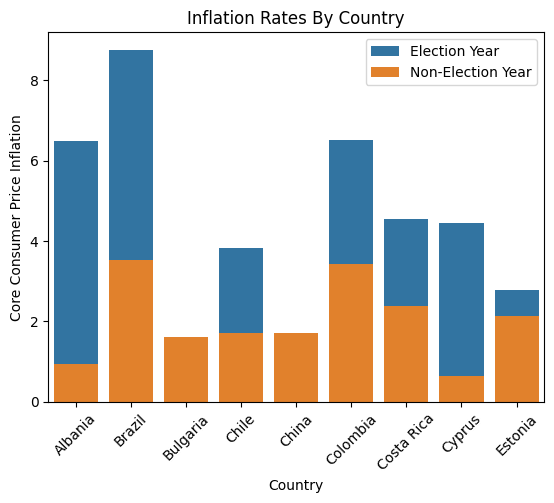

In [ ]:
sns.barplot(elections_df[:10], x = 'Country', y = 'Official Core Consumer Price Inflation (Election)', label = 'Election Year')
sns.barplot(elections_df[:10], x = 'Country', y = 'Official Core Consumer Price Inflation (Non-Election)', label = 'Non-Election Year')
plt.xticks(rotation = 45)
plt.ylabel('Core Consumer Price Inflation')
plt.title('Inflation Rates By Country')
plt.legend()

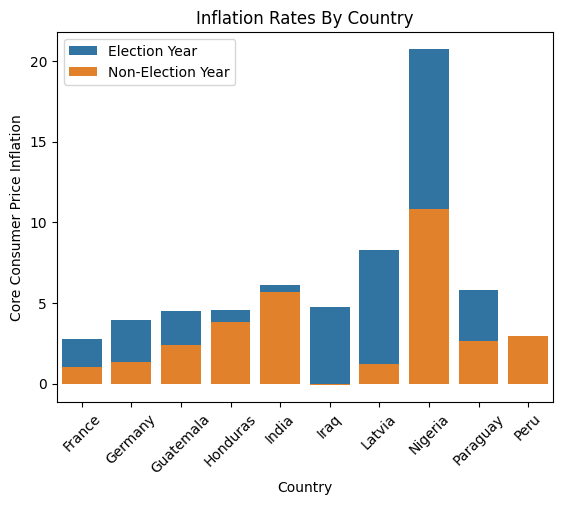

In [ ]:
sns.barplot(elections_df[10:20], x = 'Country', y = 'Official Core Consumer Price Inflation (Election)', label = 'Election Year')
sns.barplot(elections_df[10:20], x = 'Country', y = 'Official Core Consumer Price Inflation (Non-Election)', label = 'Non-Election Year')
plt.xticks(rotation = 45)
plt.ylabel('Core Consumer Price Inflation')
plt.title('Inflation Rates By Country')
plt.legend()

Text(0, 0.5, 'Inflation Rate (%)')

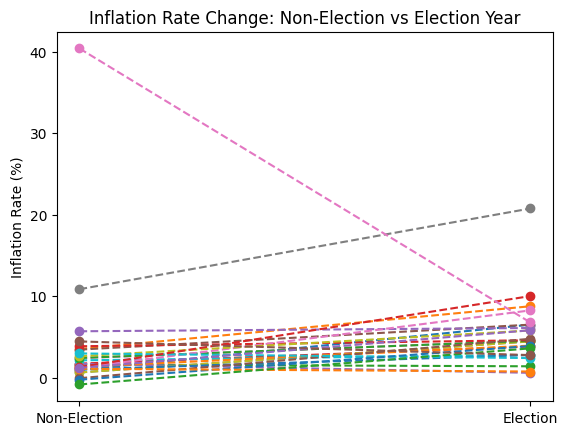

In [ ]:
ne_inf = elections_df['Official Core Consumer Price Inflation (Non-Election)']
e_inf = elections_df['Official Core Consumer Price Inflation (Election)']

for i in range(len(elections_df)):
    plt.plot(
        ['Non-Election', 'Election'],
        [ne_inf.iloc[i], e_inf.iloc[i]],
        marker='o', linestyle='--',
        label=elections_df['Country'].iloc[i]
    )

plt.title('Inflation Rate Change: Non-Election vs Election Year')
plt.ylabel('Inflation Rate (%)')

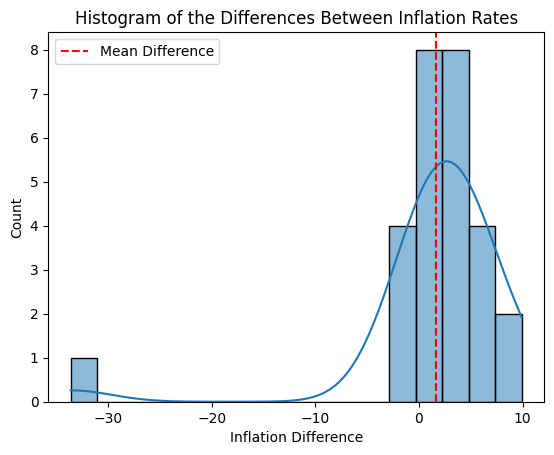

In [ ]:
inf_mean = elections_df['Inflation Difference'].mean()

sns.histplot(data = elections_df, x = 'Inflation Difference', kde = True)
plt.axvline(inf_mean, color = 'red', linestyle = '--', label = 'Mean Difference')
plt.title('Histogram of the Differences Between Inflation Rates')
plt.legend()

Text(0.5, 1.0, 'Boxplot of the Differences Between Inflation Rates')

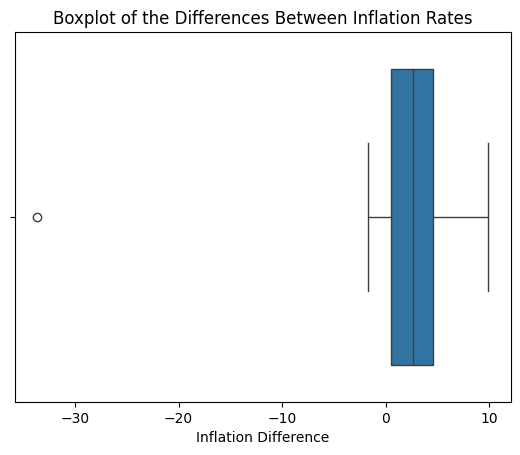

In [ ]:
sns.boxplot(data = elections_df, x = 'Inflation Difference')
plt.title('Boxplot of the Differences Between Inflation Rates')

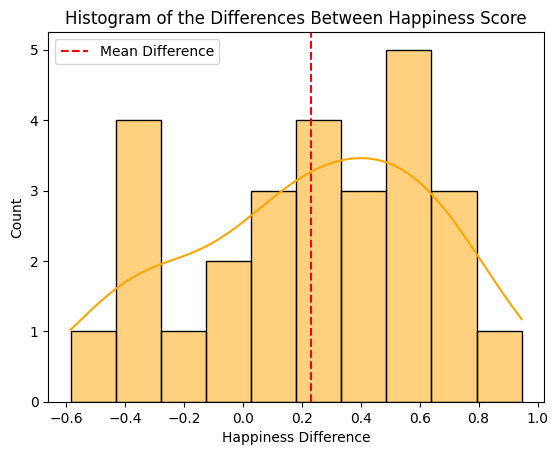

In [ ]:
happi_mean = elections_df['Happiness Difference'].mean()

sns.histplot(data = elections_df, x = 'Happiness Difference', bins = 10, kde = True, color = 'orange')
plt.axvline(happi_mean, color = 'red', linestyle = '--', label = 'Mean Difference')
plt.title('Histogram of the Differences Between Happiness Score')
plt.legend()

Text(0.5, 1.0, 'Boxplot of the Differences Between Happiness Scores')

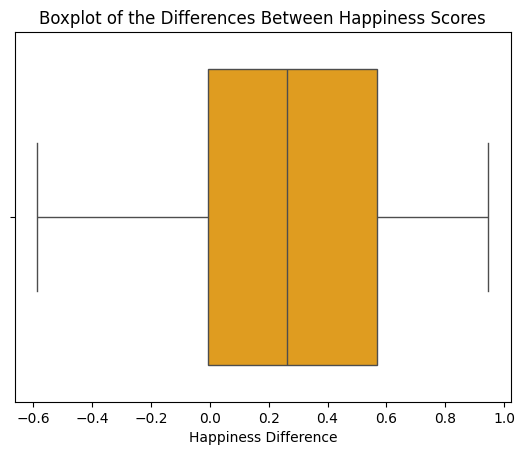

In [ ]:
sns.boxplot(data = elections_df, x = 'Happiness Difference', color = 'orange')
plt.title('Boxplot of the Differences Between Happiness Scores')

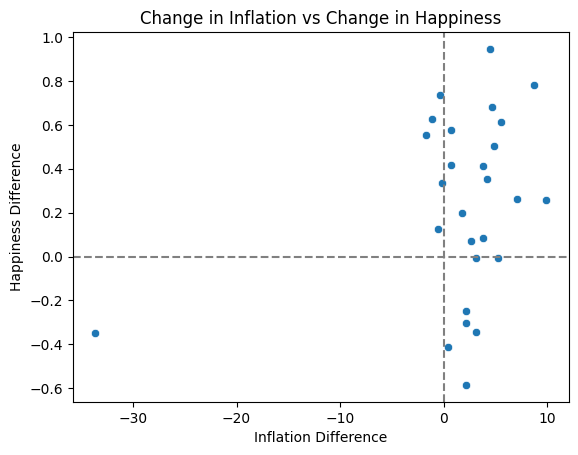

In [ ]:
sns.scatterplot(data = elections_df, 
                x='Inflation Difference', 
                y='Happiness Difference')
plt.title('Change in Inflation vs Change in Happiness')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()